# Charger le dataset

In [9]:
import pandas as pd
import numpy as np
import sys
import sklearn
from time import time


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv('https://raw.githubusercontent.com/Bilou75019/KDD-project/master/KDD_files/KDDTrain%2B.csv', delimiter=',')
df_test = pd.read_csv('https://raw.githubusercontent.com/Bilou75019/KDD-project/master/KDD_files/KDDTest%2B.csv', delimiter=',')

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


#

# Séparer données nominal, numériques et binaires

In [13]:
col_sep_names = np.array(col_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_sep_names[nominal_idx].tolist()
binary_cols = col_sep_names[binary_idx].tolist()
numeric_cols = col_sep_names[numeric_idx].tolist()

print(nominal_cols)
print(binary_cols)
print(numeric_cols)


['protocol_type', 'service', 'flag']
['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


# Créer l'ensemble d'entrainement et de test

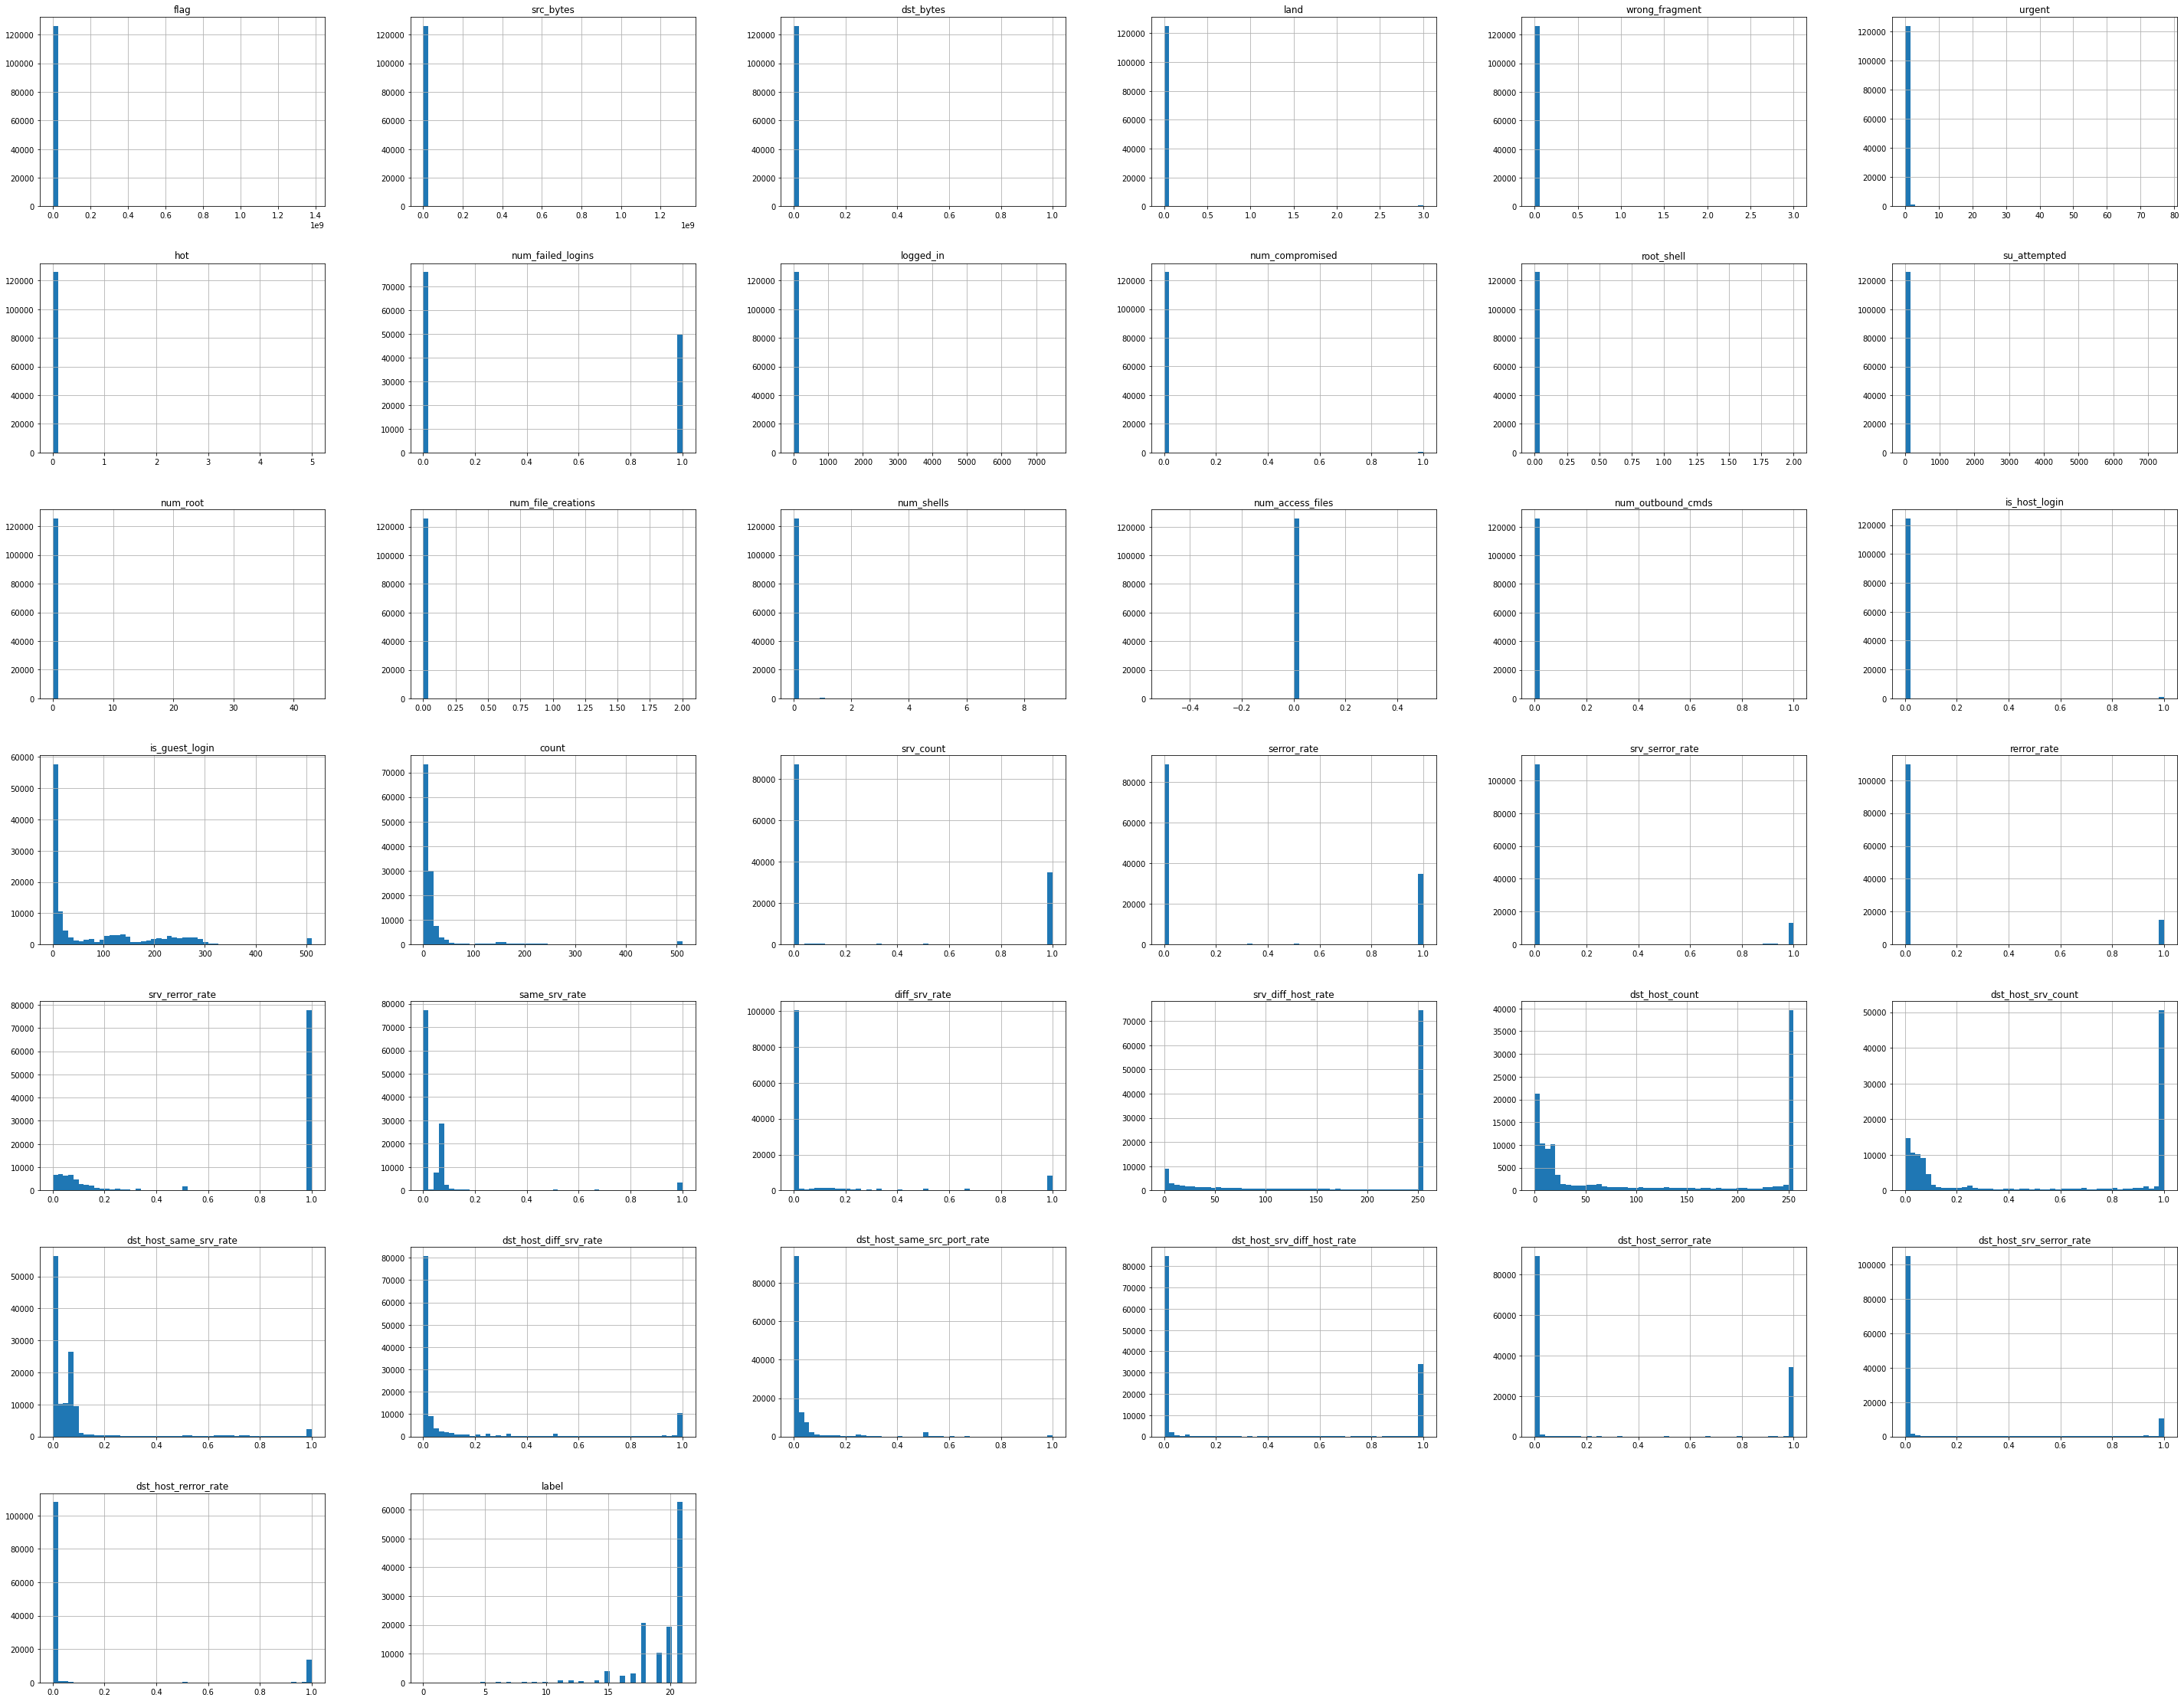

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(50,40))
plt.show()

# Sélection proportionnelle des samples selon les meilleurs features

In [ ]:
df["income_cat"] = pd.cut(df["num_shells"],
                               bins=[0., 3, 3.5, 4, 4.6,4.8, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])
df["income_cat"].hist()